In [131]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

%config InlineBackend.figure_format='retina' 

from morphing_birds import Spider3D, plot_plotly, animate_plotly

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
spider3d = Spider3D("../data/mean_spider_shape_carolina.csv")


In [138]:
spider3d.body_marker_names

['clypeus',
 'coxa1',
 'coxa2',
 'coxa3',
 'coxa4',
 'spinneret',
 'coxa5',
 'coxa6',
 'coxa7',
 'coxa8']

In [223]:
plot_plotly(spider3d)

In [159]:
spider3d.reset_transformation()
spider3d.restore_keypoints_to_average()
fake_keypoints = np.random.normal(0, 0.001, (100,35,3)) + spider3d.markers

animate_plotly(spider3d, fake_keypoints)

In [160]:
# Load main dataframe

spider_data = pd.read_csv("../data/2024-10-01-FullSpiders.csv")



In [167]:
spider_data.head()


filename  test_date   species  individual sq_level  \
0  Y20230308_carolina_14_sq040_01  Y20230308  carolina          14    sq040   
1  Y20230308_carolina_14_sq040_01  Y20230308  carolina          14    sq040   
2  Y20230308_carolina_14_sq040_01  Y20230308  carolina          14    sq040   
3  Y20230308_carolina_14_sq040_01  Y20230308  carolina          14    sq040   
4  Y20230308_carolina_14_sq040_01  Y20230308  carolina          14    sq040   

   run_num species_individual  time_in_frames  ang_roll  ang_pitch  ...  \
0        1         carolina14        0.000026  8.460388   6.697616  ...   
1        1         carolina14        1.000419  6.927353   7.350099  ...   
2        1         carolina14        2.000186  6.041385   7.506598  ...   
3        1         carolina14        2.999860  6.140213   6.856454  ...   
4        1         carolina14        3.999832  7.123809   5.372984  ...   

   center_z  clypeus_x  clypeus_y  clypeus_z  pedicel_x  pedicel_y  pedicel_z  \
0       0.0   8.686799   0.017452   1.017790   0.000032   0.000167  -0.000005   
1       0.0   8.832934   0.071476   1.262105  -0.001319  -0.007845  -0.009690   
2       0.0   8.899901   0.189238   1.262582  -0.001102  -0.007835  -0.066257   
3       0.0   8.892326   0.354997   1.053645  -0.000644  -0.005999  -0.119198   
4       0.0   8.852044   0.493799   0.809751  -0.000752  -0.010581  -0.064298   

   spinneret_x  spinneret_y  spinneret_z  
0   -15.940524     2.087852    -2.788576  
1   -15.714362     1.722694    -2.879038  
2   -15.716834     1.387585    -2.595465  
3   -15.920438     1.059110    -2.021318  
4   -16.138043     0.720597    -1.614417  

[5 rows x 119 columns]

In [176]:
# Check the missing data
missing_count = spider_data.isnull().sum()


In [170]:

# Subset to carolina only
carolina_data = spider_data[spider_data["species"] == "carolina"]

# Find the run num with the most rows
run_num = carolina_data[["run_num","individual"]].value_counts()

print(run_num)

run_num  individual
1        3             4654
         13            3125
2        3             1721
         11            1598
1        11            1481
3        3             1228
2        13             999
5        13             944
2        14             888
3        13             865
4        3              804
6        13             669
1        14             623
5        3              495
4        13             465
3        11             447
         14             368
8        13             204
4        11             169
11       11             169
10       13             122
4        14              97
9        13              97
Name: count, dtype: int64


In [209]:
selected_run = carolina_data[(
    carolina_data["run_num"] == 4) & (carolina_data["individual"] == 11)]

is_missing = selected_run.isnull().sum()

In [210]:
# Just grab the columns with _x, _y, or _z on the end
columns_to_grab = [col for col in selected_run.columns if col.endswith("_x") or col.endswith("_y") or col.endswith("_z")]

# Remove any string with centre in it
columns_to_grab = [col for col in columns_to_grab if "center" not in col]

print(len(columns_to_grab[::3]))

selected_run = selected_run[columns_to_grab]

# Convert to numpy
keypoints = selected_run.to_numpy()

# Reshape to [n,36,3]
keypoints = keypoints.reshape(keypoints.shape[0], -1, 3)

# Change to metres
keypoints = keypoints / 1000

print(keypoints.shape)

35
(169, 35, 3)


In [211]:
csv_names = spider3d.csv_marker_names

print(csv_names)

['claw1', 'tibiametatarsus1', 'patella1', 'coxa1', 'claw2', 'tibiametatarsus2', 'patella2', 'coxa2', 'claw3', 'tibiametatarsus3', 'patella3', 'coxa3', 'claw4', 'tibiametatarsus4', 'patella4', 'coxa4', 'claw5', 'tibiametatarsus5', 'patella5', 'coxa5', 'claw6', 'tibiametatarsus6', 'patella6', 'coxa6', 'claw7', 'tibiametatarsus7', 'patella7', 'coxa7', 'claw8', 'tibiametatarsus8', 'patella8', 'coxa8', 'center', 'clypeus', 'pedicel', 'spinneret']


In [212]:
column_names = columns_to_grab[::3]

print(column_names)

['claw1_x', 'tibiametatarsus1_x', 'patella1_x', 'coxa1_x', 'claw2_x', 'tibiametatarsus2_x', 'patella2_x', 'coxa2_x', 'claw3_x', 'tibiametatarsus3_x', 'patella3_x', 'coxa3_x', 'claw4_x', 'tibiametatarsus4_x', 'patella4_x', 'coxa4_x', 'claw5_x', 'tibiametatarsus5_x', 'patella5_x', 'coxa5_x', 'claw6_x', 'tibiametatarsus6_x', 'patella6_x', 'coxa6_x', 'claw7_x', 'tibiametatarsus7_x', 'patella7_x', 'coxa7_x', 'claw8_x', 'tibiametatarsus8_x', 'patella8_x', 'coxa8_x', 'clypeus_x', 'pedicel_x', 'spinneret_x']


In [213]:
spider3d = Spider3D("../data/mean_spider_shape_carolina.csv")

animate_plotly(spider3d, keypoints)

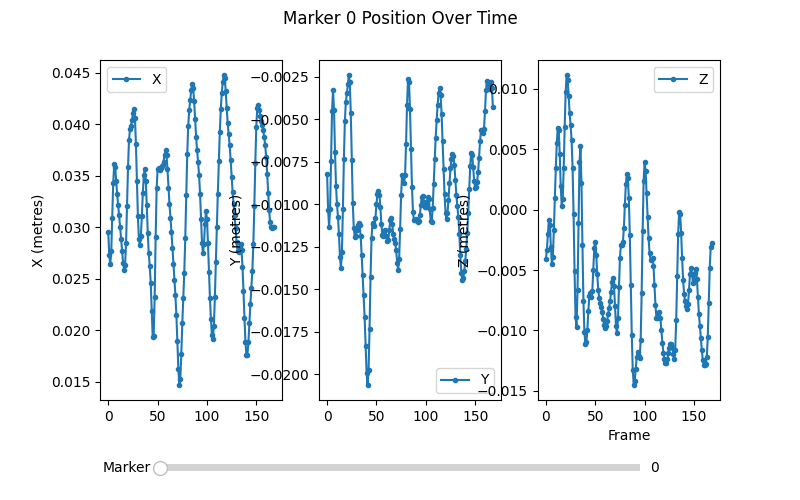

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Assuming your numpy array is called 'keypoints'
n_frames, n_markers, _ = keypoints.shape

# Create the main figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 5), sharex=True)
plt.subplots_adjust(bottom=0.2)  # Make room for the slider

# Initial marker to display
initial_marker = 0

# Plot the initial data
line1, = ax1.plot(keypoints[:, initial_marker, 0], label='X', marker="o", markersize=3)
line2, = ax2.plot(keypoints[:, initial_marker, 1], label='Y', marker="o", markersize=3)
line3, = ax3.plot(keypoints[:, initial_marker, 2], label='Z', marker="o", markersize=3)

# Set labels and titles
ax1.set_ylabel('X (metres)')
ax2.set_ylabel('Y (metres)')
ax3.set_ylabel('Z (metres)')
ax3.set_xlabel('Frame')
fig.suptitle(f'Marker {initial_marker} Position Over Time')

# Add legends
ax1.legend()
ax2.legend()
ax3.legend()

# Create the slider
ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03])
slider = Slider(ax_slider, 'Marker', 0, n_markers - 1, valinit=initial_marker, valstep=1)

# Update function for the slider
def update(val):
    marker = int(slider.val)
    line1.set_ydata(keypoints[:, marker, 0])
    line2.set_ydata(keypoints[:, marker, 1])
    line3.set_ydata(keypoints[:, marker, 2])
    fig.suptitle(f'Marker {marker} Position Over Time')
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Assuming your numpy array is called 'keypoints_full'
n_frames, n_markers, _ = keypoints_full.shape

# Create the main figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
plt.subplots_adjust(bottom=0.2)  # Make room for the slider

# Initial marker to display
initial_marker = 0

# Plot the initial data
line1, = ax1.plot(keypoints_full[:, initial_marker, 0], label='X')
line2, = ax2.plot(keypoints_full[:, initial_marker, 1], label='Y')
line3, = ax3.plot(keypoints_full[:, initial_marker, 2], label='Z')

# Set labels and titles
ax1.set_ylabel('X (metres)')
ax2.set_ylabel('Y (metres)')
ax3.set_ylabel('Z (metres)')
ax3.set_xlabel('Frame')
fig.suptitle(f'Marker {initial_marker} Position Over Time')

# Add legends
ax1.legend()
ax2.legend()
ax3.legend()

# Create the slider
ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03])
slider = Slider(ax_slider, 'Marker', 0, n_markers - 1, valinit=initial_marker, valstep=1)

# Update function for the slider
def update(val):
    marker = int(slider.val)
    line1.set_ydata(keypoints_full[:, marker, 0])
    line2.set_ydata(keypoints_full[:, marker, 1])
    line3.set_ydata(keypoints_full[:, marker, 2])
    fig.suptitle(f'Marker {marker} Position Over Time')
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.tight_layout()
plt.show()

In [ ]:
%matplotlib widget
# Make a set of keypoints by adding some random noise to the original keypoints
spider3d.reset_transformation()
spider3d.restore_keypoints_to_average()
fake_keypoints = np.random.normal(0, 0.001, (100,35,3)) + spider3d.markers


# Animate the random motion
animate(spider3d, fake_keypoints, rotation_type="static")


In [221]:
import gc
import matplotlib.pyplot as plt

gc.collect()
plt.close("all")



In [206]:
# Make a scatter plot of all the markers 

keypoints_full = carolina_data[columns_to_grab].to_numpy()


# Reshape to [n,36,3]
keypoints_full = keypoints_full.reshape(keypoints_full.shape[0], -1, 3)

# Change to metres
keypoints_full = keypoints_full / 1000

print(keypoints_full.shape)

(22232, 35, 3)
